In [154]:
# Set up imports and load the data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

2. Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf. You may want to use matplotlib.pyplot and savefig to do this. This pre-analysis of the data set will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier

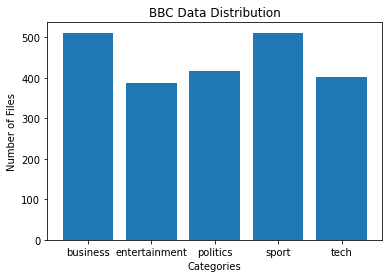

In [2]:
category_distribution = {'business':0, 'entertainment':0, 'politics':0, 'sport':0, 'tech':0};
BBC_data_dir='../data/BBC';

for name in os.listdir(BBC_data_dir):
    if name in category_distribution.keys():
        category_dir = os.path.join(BBC_data_dir, name)
        files_in_directory = next(os.walk(category_dir))[2]
        category_distribution[name] = len(files_in_directory)
        
fig = plt.figure()
plt.bar(
    category_distribution.keys(),
    category_distribution.values(), 
);

plt.xlabel('Categories')
plt.ylabel('Number of Files')
plt.title('BBC Data Distribution')

plt.show()
fig.savefig("BBC-distribution.pdf")

3. Load the corpus using load files and make sure you set the encoding to latin1. This will read the file structure and assign the category name to each file from their parent directory name.

In [3]:
# 3. Load all the data from the files.
corpus = load_files(
    container_path='../data/BBC',
    description='Reference: D. Greene and P. Cunningham."Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.',
    encoding='latin1'
)

4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. This means  that the frequency of each word in each class must be computed and stored in a term-document matrix. For this, you can use feature extraction.text.CountVectorizer.

In [23]:
# 4. Pre-process the data. Returns a dictionary, mapping terms to feature indices
vectorizer = CountVectorizer(input='content', encoding='latin1') # Not sure if encoding needs to be latin1 here as well.
term_document_dictionary = vectorizer.fit_transform(corpus.data)
term_document_matrix = term_document_dictionary.toarray()

5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with
   the parameter random state set to None.

In [5]:
# 5. Split the data
target_labels = corpus.target
X_train, X_test, y_train, y_test = train_test_split(
    term_document_matrix, # Not sure if this should be term_document_dictionary
    target_labels,
    train_size=0.8, 
    test_size=0.2,
    random_state=None
)

6. Train a multinomial Naive Bayes Classifier (naive bayes.MultinomialNB) on the training set using the
   default parameters and evaluate it on the test set.

In [6]:
# Train (Calculate the probabilties)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Use above calculated probabilities on the test set.
y_naive_bayes_predict = naive_bayes_classifier.predict(X_test)

7. b) the confusion matrix

In [7]:
# confusion matrix
print("confusion matrix:")
print(confusion_matrix(y_test, y_naive_bayes_predict))

confusion matrix:
[[99  0  3  0  2]
 [ 0 70  1  0  2]
 [ 1  0 95  0  0]
 [ 0  0  1 87  0]
 [ 0  0  0  0 84]]


7. c) the precision, recall, and F1-measure for each class

In [8]:
# precision score
print("precision score:")
print(precision_score(y_test, y_naive_bayes_predict, average=None))

# recall score
print("\nrecall score:")
print(recall_score(y_test, y_naive_bayes_predict, average=None))

# f1-measure
print("\nf1-measure:")
print(f1_score(y_test, y_naive_bayes_predict, average=None))

precision score:
[0.99       1.         0.95       1.         0.95454545]

recall score:
[0.95192308 0.95890411 0.98958333 0.98863636 1.        ]

f1-measure:
[0.97058824 0.97902098 0.96938776 0.99428571 0.97674419]


7. d) the accuracy, macro-average F1 and weighted-average F1 of the model

In [9]:
# accuracy
print("accuracy score:")
print(accuracy_score(y_test, y_naive_bayes_predict))

# macro-average f1
print("\nmacro-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict, average='macro'))

# weighted-average f1
print("\nweighted-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict, average='weighted'))

accuracy score:
0.9775280898876404

macro-average f1 score:
0.9780053739498727

weighted-average f1 score:
0.9775608694695853


7. e) the prior probability of each class

In [10]:
# Not sure about here, there are less documents compared to what is displayed in the generated PDF, however I believe
# that makes sense as we use an 80% training split. However the ordering of largest to smallest # of documents/category has changed
# for example, sports previously had the most amount of documents, now it has the second most.

# Not sure if perhaps the mapping of category_index to target_names is incorrect.

print(category_distribution.keys())
print(category_distribution.values())
print(corpus.target_names)
print("\n\n\n")

# OR: use class_log_prior_ attribute. Maybe just show both?

#### Answer, for now:
# prior probability, probability of a category before any evidence is obtained 
# (i.e.) Probability of a category without looking at it's contents

# Calculate total # of documents
total_num_of_documents = sum(naive_bayes_classifier.class_count_);
print("P(category) = # of documents in category / total # of documents\n")
    
for category_index in naive_bayes_classifier.classes_:
    print(f"P({corpus.target_names[category_index]}) = {naive_bayes_classifier.class_count_[category_index]/total_num_of_documents}")

dict_keys(['business', 'entertainment', 'politics', 'sport', 'tech'])
dict_values([510, 386, 417, 511, 401])
['business', 'entertainment', 'politics', 'sport', 'tech']




P(category) = # of documents in category / total # of documents

P(business) = 0.22808988764044943
P(entertainment) = 0.17584269662921348
P(politics) = 0.18033707865168538
P(sport) = 0.23764044943820226
P(tech) = 0.17808988764044945


7. f) the size of the vocabulary (i.e. the number of different words)

In [11]:
#Vocabulary
print(f"Vocabulary size: {len(vectorizer.vocabulary_.keys())}")

Vocabulary size: 29421


7. g) the number of word-tokens in each class (i.e. the number of words in total)

In [12]:
total_words_in_corpus=0
for category_index in naive_bayes_classifier.classes_:
    total_words_in_class=int(sum(naive_bayes_classifier.feature_count_[category_index]))
    total_words_in_corpus+=total_words_in_class
    print(f"# of word-tokens in class {corpus.target_names[category_index]}: {total_words_in_class}")                                                                         

# of word-tokens in class business: 131035
# of word-tokens in class entertainment: 102443
# of word-tokens in class politics: 146012
# of word-tokens in class sport: 133730
# of word-tokens in class tech: 159565


7. h) the number of word-tokens in the entire corpus

In [13]:
print(f"Total words in corpus: {total_words_in_corpus}")

Total words in corpus: 672785


7. i) the number and percentage of words with a frequency of zero in each class

In [16]:
for category_index in naive_bayes_classifier.classes_:
    feature_count_only_zero = new_list = list(filter(lambda x: (x==0) , naive_bayes_classifier.feature_count_[category_index]))
    number_of_zeroes_in_class=len(feature_count_only_zero)
    total_words_in_class=int(sum(naive_bayes_classifier.feature_count_[category_index]))
    print(f"Number of words with a frequency of zero in class {corpus.target_names[category_index]}: {number_of_zeroes_in_class}")
    print(f"Percentage of words with a frequency of zero in class {corpus.target_names[category_index]}: {(number_of_zeroes_in_class/total_words_in_class)*100}%\n") 

Number of words with a frequency of zero in class business: 18693
Percentage of words with a frequency of zero in class business: 14.265654214522838%

Number of words with a frequency of zero in class entertainment: 18964
Percentage of words with a frequency of zero in class entertainment: 18.511757757972727%

Number of words with a frequency of zero in class politics: 19201
Percentage of words with a frequency of zero in class politics: 13.150289017341041%

Number of words with a frequency of zero in class sport: 19793
Percentage of words with a frequency of zero in class sport: 14.80071786435355%

Number of words with a frequency of zero in class tech: 18308
Percentage of words with a frequency of zero in class tech: 11.473694105850281%



7. j) the number and percentage of words with a frequency of one in the entire corpus

In [42]:
sum_ones = 0
for category_index in naive_bayes_classifier.classes_:
    feature_count_only_ones = new_list = list(filter(lambda x: (x==1) , naive_bayes_classifier.feature_count_[category_index]))
    number_of_ones_in_class=len(feature_count_only_ones)
    sum_ones += number_of_ones_in_class

print(f"Number of words with a frequency of one in corpus: {sum_ones}")
print(f"Percentage of words with a frequency of one in corpus: {(sum_ones/total_words_in_corpus)*100}%\n") 

Number of words with a frequency of one in corpus: 20954
Percentage of words with a frequency of one in corpus: 3.1145165245955244%



7. k) your 2 favorite words (that are present in the vocabulary) and their log-prob

In [177]:
# Function only returns log of probability of a feature (f) given class (C) -- P(f|C)
# To get probability of that feature  P(f)= Σ P(f)xP(f|C) 
fav1 = 'friday'
fav2 = 'there'
feat_names = vectorizer.get_feature_names()

fav1_index = feat_names.index(fav1)
fav2_index = feat_names.index(fav2)
prob1 = 0
prob2 = 0

for i in range(5):
    prob1 += (np.exp(naive_bayes_classifier.feature_log_prob_[i][fav1_index]))*(np.exp(naive_bayes_classifier.class_log_prior_[i]))
    prob2 += (np.exp(naive_bayes_classifier.feature_log_prob_[i][fav2_index]))*(np.exp(naive_bayes_classifier.class_log_prior_[i]))  

#convert probabilities to log-prob
print(np.log(prob1)) 
print(np.log(prob2))

-8.39551851053172
-6.330864984866497


8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change the model name to something like “MultinomialNB default values, try 2” and append the results to the file bbc-performance.txt.

# Step 8: Redo steps 6 and 7 without changing anything

In [178]:
# Redo of step 6 with default values
naive_bayes_classifier_2 = MultinomialNB()
naive_bayes_classifier_2.fit(X_train, y_train)

y_naive_bayes_predict_2 = naive_bayes_classifier_2.predict(X_test)

In [179]:
# Redo of 7b
print("confusion matrix:")
print(confusion_matrix(y_test, y_naive_bayes_predict_2))

confusion matrix:
[[99  0  3  0  2]
 [ 0 70  1  0  2]
 [ 1  0 95  0  0]
 [ 0  0  1 87  0]
 [ 0  0  0  0 84]]


In [180]:
# Redo of 7c

# precision score
print("precision score:")
print(precision_score(y_test, y_naive_bayes_predict_2, average=None))

# recall score
print("\nrecall score:")
print(recall_score(y_test, y_naive_bayes_predict_2, average=None))

# f1-measure
print("\nf1-measure:")
print(f1_score(y_test, y_naive_bayes_predict_2, average=None))

precision score:
[0.99       1.         0.95       1.         0.95454545]

recall score:
[0.95192308 0.95890411 0.98958333 0.98863636 1.        ]

f1-measure:
[0.97058824 0.97902098 0.96938776 0.99428571 0.97674419]


In [181]:
# Redo of 7d

# accuracy
print("accuracy score:")
print(accuracy_score(y_test, y_naive_bayes_predict_2))

# macro-average f1
print("\nmacro-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict_2, average='macro'))

# weighted-average f1
print("\nweighted-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict_2, average='weighted'))

accuracy score:
0.9775280898876404

macro-average f1 score:
0.9780053739498727

weighted-average f1 score:
0.9775608694695853


In [182]:
# Redo of 7e

# Calculate total # of documents
total_num_of_documents_2 = sum(naive_bayes_classifier_2.class_count_);
print("P(category) = # of documents in category / total # of documents\n")
    
for category_index in naive_bayes_classifier_2.classes_:
    print(f"P({corpus.target_names[category_index]}) = {naive_bayes_classifier_2.class_count_[category_index]/total_num_of_documents_2}")

P(category) = # of documents in category / total # of documents

P(business) = 0.22808988764044943
P(entertainment) = 0.17584269662921348
P(politics) = 0.18033707865168538
P(sport) = 0.23764044943820226
P(tech) = 0.17808988764044945


In [183]:
# Redo of 7f

#Vocabulary
print(f"Vocabulary size: {len(vectorizer.vocabulary_.keys())}")

Vocabulary size: 29421


In [184]:
# Redo of 7g

total_words_in_corpus_2=0
for category_index in naive_bayes_classifier_2.classes_:
    total_words_in_class_2=int(sum(naive_bayes_classifier_2.feature_count_[category_index]))
    total_words_in_corpus_2+=total_words_in_class_2
    print(f"# of word-tokens in class {corpus.target_names[category_index]}: {total_words_in_class_2}")  

# of word-tokens in class business: 131035
# of word-tokens in class entertainment: 102443
# of word-tokens in class politics: 146012
# of word-tokens in class sport: 133730
# of word-tokens in class tech: 159565


In [185]:
# Redo of 7h
print(f"Total words in corpus: {total_words_in_corpus_2}")

Total words in corpus: 672785


In [186]:
# Redo of 7i
for category_index in naive_bayes_classifier_2.classes_:
    feature_count_only_zero_2 = new_list_2 = list(filter(lambda x: (x==0) , naive_bayes_classifier_2.feature_count_[category_index]))
    number_of_zeroes_in_class_2=len(feature_count_only_zero_2)
    total_words_in_class_2=int(sum(naive_bayes_classifier_2.feature_count_[category_index]))
    print(f"Number of words with a frequency of zero in class {corpus.target_names[category_index]}: {number_of_zeroes_in_class_2}")
    print(f"Percentage of words with a frequency of zero in class {corpus.target_names[category_index]}: {(number_of_zeroes_in_class_2/total_words_in_class_2)*100}%\n") 

Number of words with a frequency of zero in class business: 18693
Percentage of words with a frequency of zero in class business: 14.265654214522838%

Number of words with a frequency of zero in class entertainment: 18964
Percentage of words with a frequency of zero in class entertainment: 18.511757757972727%

Number of words with a frequency of zero in class politics: 19201
Percentage of words with a frequency of zero in class politics: 13.150289017341041%

Number of words with a frequency of zero in class sport: 19793
Percentage of words with a frequency of zero in class sport: 14.80071786435355%

Number of words with a frequency of zero in class tech: 18308
Percentage of words with a frequency of zero in class tech: 11.473694105850281%



In [187]:
# Redo of 7j

sum_ones_2 = 0
for category_index in naive_bayes_classifier_2.classes_:
    feature_count_only_ones_2 = new_list_2 = list(filter(lambda x: (x==1) , naive_bayes_classifier_2.feature_count_[category_index]))
    number_of_ones_in_class_2=len(feature_count_only_ones_2)
    sum_ones_2 += number_of_ones_in_class_2

print(f"Number of words with a frequency of one in corpus: {sum_ones_2}")
print(f"Percentage of words with a frequency of one in corpus: {(sum_ones_2/total_words_in_corpus_2)*100}%\n") 

Number of words with a frequency of one in corpus: 20954
Percentage of words with a frequency of one in corpus: 3.1145165245955244%



In [188]:
# Redo of 7k

# Function only returns log of probability of a feature (f) given class (C) -- P(f|C)
# To get probability of that feature  P(f)= Σ P(f)xP(f|C) 
fav1 = 'friday'
fav2 = 'there'
feat_names = vectorizer.get_feature_names()

fav1_index = feat_names.index(fav1)
fav2_index = feat_names.index(fav2)
prob1_2 = 0
prob2_2 = 0

for i in range(5):
    prob1_2 += (np.exp(naive_bayes_classifier_2.feature_log_prob_[i][fav1_index]))*(np.exp(naive_bayes_classifier_2.class_log_prior_[i]))
    prob2_2 += (np.exp(naive_bayes_classifier_2.feature_log_prob_[i][fav2_index]))*(np.exp(naive_bayes_classifier_2.class_log_prior_[i]))  

#convert probabilities to log-prob
print(np.log(prob1_2)) 
print(np.log(prob2_2))

-8.39551851053172
-6.330864984866497


9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001. Append the results at the end of bbc-performance.txt.

# Step 9: Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001

In [190]:
# Redo of step 6 with smoothing value of 0.0001
naive_bayes_classifier_3 = MultinomialNB(alpha=0.0001)
naive_bayes_classifier_3.fit(X_train, y_train)

y_naive_bayes_predict_3 = naive_bayes_classifier_3.predict(X_test)

In [191]:
# Redo of 7b
print("confusion matrix:")
print(confusion_matrix(y_test, y_naive_bayes_predict_3))

confusion matrix:
[[100   0   2   0   2]
 [  0  71   0   0   2]
 [  2   0  94   0   0]
 [  0   0   1  87   0]
 [  1   0   0   0  83]]


In [192]:
# Redo of 7c

# precision score
print("precision score:")
print(precision_score(y_test, y_naive_bayes_predict_3, average=None))

# recall score
print("\nrecall score:")
print(recall_score(y_test, y_naive_bayes_predict_3, average=None))

# f1-measure
print("\nf1-measure:")
print(f1_score(y_test, y_naive_bayes_predict_3, average=None))

precision score:
[0.97087379 1.         0.96907216 1.         0.95402299]

recall score:
[0.96153846 0.97260274 0.97916667 0.98863636 0.98809524]

f1-measure:
[0.96618357 0.98611111 0.97409326 0.99428571 0.97076023]


In [193]:
# Redo of 7d

# accuracy
print("accuracy score:")
print(accuracy_score(y_test, y_naive_bayes_predict_3))

# macro-average f1
print("\nmacro-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict_3, average='macro'))

# weighted-average f1
print("\nweighted-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict_3, average='weighted'))

accuracy score:
0.9775280898876404

macro-average f1 score:
0.9782867796885771

weighted-average f1 score:
0.9775801320734653


In [195]:
# Redo of 7e

# Calculate total # of documents
total_num_of_documents_3 = sum(naive_bayes_classifier_3.class_count_);
print("P(category) = # of documents in category / total # of documents\n")
    
for category_index in naive_bayes_classifier_3.classes_:
    print(f"P({corpus.target_names[category_index]}) = {naive_bayes_classifier_3.class_count_[category_index]/total_num_of_documents_3}")

P(category) = # of documents in category / total # of documents

P(business) = 0.22808988764044943
P(entertainment) = 0.17584269662921348
P(politics) = 0.18033707865168538
P(sport) = 0.23764044943820226
P(tech) = 0.17808988764044945


In [196]:
# Redo of 7f

#Vocabulary
print(f"Vocabulary size: {len(vectorizer.vocabulary_.keys())}")

Vocabulary size: 29421


In [197]:
# Redo of 7g

total_words_in_corpus_3=0
for category_index in naive_bayes_classifier_3.classes_:
    total_words_in_class_3=int(sum(naive_bayes_classifier_3.feature_count_[category_index]))
    total_words_in_corpus_3+=total_words_in_class_3
    print(f"# of word-tokens in class {corpus.target_names[category_index]}: {total_words_in_class_3}")  

# of word-tokens in class business: 131035
# of word-tokens in class entertainment: 102443
# of word-tokens in class politics: 146012
# of word-tokens in class sport: 133730
# of word-tokens in class tech: 159565


In [198]:
# Redo of 7h
print(f"Total words in corpus: {total_words_in_corpus_3}")

Total words in corpus: 672785


In [199]:
# Redo of 7i
for category_index in naive_bayes_classifier_3.classes_:
    feature_count_only_zero_3 = new_list_3 = list(filter(lambda x: (x==0) , naive_bayes_classifier_3.feature_count_[category_index]))
    number_of_zeroes_in_class_3=len(feature_count_only_zero_3)
    total_words_in_class_3=int(sum(naive_bayes_classifier_3.feature_count_[category_index]))
    print(f"Number of words with a frequency of zero in class {corpus.target_names[category_index]}: {number_of_zeroes_in_class_3}")
    print(f"Percentage of words with a frequency of zero in class {corpus.target_names[category_index]}: {(number_of_zeroes_in_class_3/total_words_in_class_3)*100}%\n")

Number of words with a frequency of zero in class business: 18693
Percentage of words with a frequency of zero in class business: 14.265654214522838%

Number of words with a frequency of zero in class entertainment: 18964
Percentage of words with a frequency of zero in class entertainment: 18.511757757972727%

Number of words with a frequency of zero in class politics: 19201
Percentage of words with a frequency of zero in class politics: 13.150289017341041%

Number of words with a frequency of zero in class sport: 19793
Percentage of words with a frequency of zero in class sport: 14.80071786435355%

Number of words with a frequency of zero in class tech: 18308
Percentage of words with a frequency of zero in class tech: 11.473694105850281%



In [200]:
# Redo of 7j

sum_ones_3 = 0
for category_index in naive_bayes_classifier_3.classes_:
    feature_count_only_ones_3 = new_list_3 = list(filter(lambda x: (x==1) , naive_bayes_classifier_3.feature_count_[category_index]))
    number_of_ones_in_class_3=len(feature_count_only_ones_3)
    sum_ones_3 += number_of_ones_in_class_3

print(f"Number of words with a frequency of one in corpus: {sum_ones_3}")
print(f"Percentage of words with a frequency of one in corpus: {(sum_ones_3/total_words_in_corpus_3)*100}%\n")

Number of words with a frequency of one in corpus: 20954
Percentage of words with a frequency of one in corpus: 3.1145165245955244%



In [201]:
# Redo of 7k

# Function only returns log of probability of a feature (f) given class (C) -- P(f|C)
# To get probability of that feature  P(f)= Σ P(f)xP(f|C) 
fav1 = 'friday'
fav2 = 'there'
feat_names = vectorizer.get_feature_names()

fav1_index = feat_names.index(fav1)
fav2_index = feat_names.index(fav2)
prob1_3 = 0
prob2_3 = 0

for i in range(5):
    prob1_3 += (np.exp(naive_bayes_classifier_3.feature_log_prob_[i][fav1_index]))*(np.exp(naive_bayes_classifier_3.class_log_prior_[i]))
    prob2_3 += (np.exp(naive_bayes_classifier_3.feature_log_prob_[i][fav2_index]))*(np.exp(naive_bayes_classifier_3.class_log_prior_[i]))  

#convert probabilities to log-prob
print(np.log(prob1_3)) 
print(np.log(prob2_3))

-8.214434302022129
-6.136728869371583


10. Redo steps 6 and 7, but this time, change the smoothing value to 0.9. Append the results at the end of bbc-performance.txt.

# Step 10: Redo steps 6 and 7, but this time, change the smoothing value to 0.9

In [202]:
# Redo of step 6 with smoothing value of 0.9
naive_bayes_classifier_4 = MultinomialNB(alpha=0.9)
naive_bayes_classifier_4.fit(X_train, y_train)

y_naive_bayes_predict_4 = naive_bayes_classifier_4.predict(X_test)

In [203]:
# Redo of 7b
print("confusion matrix:")
print(confusion_matrix(y_test, y_naive_bayes_predict_4))

confusion matrix:
[[99  0  3  0  2]
 [ 0 70  1  0  2]
 [ 1  0 95  0  0]
 [ 0  0  1 87  0]
 [ 0  0  0  0 84]]


In [204]:
# Redo of 7c

# precision score
print("precision score:")
print(precision_score(y_test, y_naive_bayes_predict_4, average=None))

# recall score
print("\nrecall score:")
print(recall_score(y_test, y_naive_bayes_predict_4, average=None))

# f1-measure
print("\nf1-measure:")
print(f1_score(y_test, y_naive_bayes_predict_4, average=None))

precision score:
[0.99       1.         0.95       1.         0.95454545]

recall score:
[0.95192308 0.95890411 0.98958333 0.98863636 1.        ]

f1-measure:
[0.97058824 0.97902098 0.96938776 0.99428571 0.97674419]


In [205]:
# Redo of 7d

# accuracy
print("accuracy score:")
print(accuracy_score(y_test, y_naive_bayes_predict_4))

# macro-average f1
print("\nmacro-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict_4, average='macro'))

# weighted-average f1
print("\nweighted-average f1 score:")
print(f1_score(y_test, y_naive_bayes_predict_4, average='weighted'))

accuracy score:
0.9775280898876404

macro-average f1 score:
0.9780053739498727

weighted-average f1 score:
0.9775608694695853


In [206]:
# Redo of 7e

# Calculate total # of documents
total_num_of_documents_4 = sum(naive_bayes_classifier_4.class_count_);
print("P(category) = # of documents in category / total # of documents\n")
    
for category_index in naive_bayes_classifier_4.classes_:
    print(f"P({corpus.target_names[category_index]}) = {naive_bayes_classifier_4.class_count_[category_index]/total_num_of_documents_4}")

P(category) = # of documents in category / total # of documents

P(business) = 0.22808988764044943
P(entertainment) = 0.17584269662921348
P(politics) = 0.18033707865168538
P(sport) = 0.23764044943820226
P(tech) = 0.17808988764044945


In [207]:
# Redo of 7f

#Vocabulary
print(f"Vocabulary size: {len(vectorizer.vocabulary_.keys())}")

Vocabulary size: 29421


In [208]:
# Redo of 7g

total_words_in_corpus_4=0
for category_index in naive_bayes_classifier_4.classes_:
    total_words_in_class_4=int(sum(naive_bayes_classifier_4.feature_count_[category_index]))
    total_words_in_corpus_4+=total_words_in_class_4
    print(f"# of word-tokens in class {corpus.target_names[category_index]}: {total_words_in_class_4}") 

# of word-tokens in class business: 131035
# of word-tokens in class entertainment: 102443
# of word-tokens in class politics: 146012
# of word-tokens in class sport: 133730
# of word-tokens in class tech: 159565


In [209]:
# Redo of 7h
print(f"Total words in corpus: {total_words_in_corpus_4}")

Total words in corpus: 672785


In [210]:
# Redo of 7i
for category_index in naive_bayes_classifier_4.classes_:
    feature_count_only_zero_4 = new_list_4 = list(filter(lambda x: (x==0) , naive_bayes_classifier_4.feature_count_[category_index]))
    number_of_zeroes_in_class_4=len(feature_count_only_zero_4)
    total_words_in_class_4=int(sum(naive_bayes_classifier_4.feature_count_[category_index]))
    print(f"Number of words with a frequency of zero in class {corpus.target_names[category_index]}: {number_of_zeroes_in_class_4}")
    print(f"Percentage of words with a frequency of zero in class {corpus.target_names[category_index]}: {(number_of_zeroes_in_class_4/total_words_in_class_4)*100}%\n")

Number of words with a frequency of zero in class business: 18693
Percentage of words with a frequency of zero in class business: 14.265654214522838%

Number of words with a frequency of zero in class entertainment: 18964
Percentage of words with a frequency of zero in class entertainment: 18.511757757972727%

Number of words with a frequency of zero in class politics: 19201
Percentage of words with a frequency of zero in class politics: 13.150289017341041%

Number of words with a frequency of zero in class sport: 19793
Percentage of words with a frequency of zero in class sport: 14.80071786435355%

Number of words with a frequency of zero in class tech: 18308
Percentage of words with a frequency of zero in class tech: 11.473694105850281%



In [211]:
# Redo of 7j

sum_ones_4 = 0
for category_index in naive_bayes_classifier_4.classes_:
    feature_count_only_ones_4 = new_list_4 = list(filter(lambda x: (x==1) , naive_bayes_classifier_4.feature_count_[category_index]))
    number_of_ones_in_class_4=len(feature_count_only_ones_4)
    sum_ones_4 += number_of_ones_in_class_4

print(f"Number of words with a frequency of one in corpus: {sum_ones_4}")
print(f"Percentage of words with a frequency of one in corpus: {(sum_ones_4/total_words_in_corpus_4)*100}%\n")

Number of words with a frequency of one in corpus: 20954
Percentage of words with a frequency of one in corpus: 3.1145165245955244%



In [212]:
# Redo of 7k

# Function only returns log of probability of a feature (f) given class (C) -- P(f|C)
# To get probability of that feature  P(f)= Σ P(f)xP(f|C) 
fav1 = 'friday'
fav2 = 'there'
feat_names = vectorizer.get_feature_names()

fav1_index = feat_names.index(fav1)
fav2_index = feat_names.index(fav2)
prob1_4 = 0
prob2_4 = 0

for i in range(5):
    prob1_4 += (np.exp(naive_bayes_classifier_4.feature_log_prob_[i][fav1_index]))*(np.exp(naive_bayes_classifier_4.class_log_prior_[i]))
    prob2_4 += (np.exp(naive_bayes_classifier_4.feature_log_prob_[i][fav2_index]))*(np.exp(naive_bayes_classifier_4.class_log_prior_[i]))  

#convert probabilities to log-prob
print(np.log(prob1_4)) 
print(np.log(prob2_4))

-8.37928708961673
-6.313161738180073
